# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](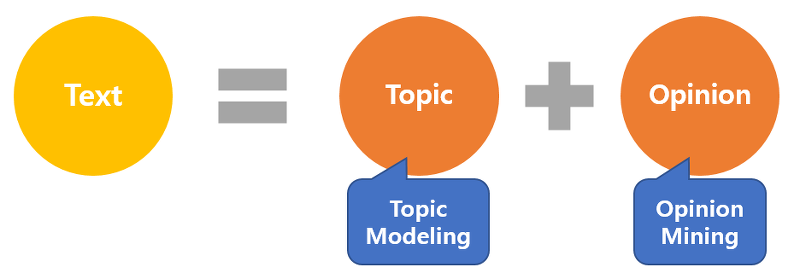)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=ef0de2a7e3a0ca03e6e9da6248572f8607a02706e3dc8250666d64781752444f
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성 
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [6]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
  print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



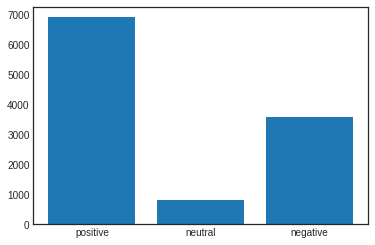

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive = 0
neutral = 0
negative = 0

for i in newsdata.data:
  score = afinn.score(i)
  if score>0:
    positive+=1
  elif score==0:
    neutral+=1
  else:
    negative +=1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])
plt.show()

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [8]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 29.6 MB/s 
     |████████████████████████████████| 448 kB 38.7 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/

In [9]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [10]:
train_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [12]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [13]:
print(train_data.isnull().sum())

train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [17]:
#한글 빼고 다 공백화
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data[:10]

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1
5,5403919,막걸음마뗀세부터초등학교학년생인살용영화ㅋㅋㅋ별반개도아까움,0
6,7797314,원작의긴장감을제대로살려내지못했다,0
7,9443947,별반개도아깝다욕나온다이응경길용우연기생활이몇년인지정말발로해도그것보단낫겟다납치감금만반복...,0
8,7156791,액션이없는데도재미있는몇안되는영화,1
9,5912145,왜케평점이낮은건데꽤볼만한데헐리우드식화려함에만너무길들여져있나,1


In [18]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id            0
document    789
label         0
dtype: int64


In [19]:
train_data = train_data.dropna(how='any')
print(len(train_data))

145393


In [20]:
test_data.drop_duplicates(subset=['document'],inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [21]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [23]:
mecab = Mecab()

X_train = []
for sentences in train_data['document']:
  X_train.append([word for word in mecab.morphs(sentences) if not word in stopwords])

In [24]:
print(X_train[:1])

[['아', '더', '빙', '진짜', '짜증', '나', '네', '요목', '소리']]


In [25]:
X_test = []
for sentences in test_data['document']:
  X_test.append([word for word in mecab.morphs(sentences) if not word in stopwords])

In [27]:
#단어에 index 붙히기
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '는데': 14, '만': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '로': 20, '정말': 21, '것': 22, '지만': 23, '네요': 24, '어': 25, '음': 26, '같': 27, '아': 28, '진짜': 29, '재밌': 30, '에서': 31, '했': 32, '기': 33, '않': 34, '네': 35, '았': 36, '거': 37, '수': 38, '되': 39, '면': 40, '인': 41, 'ㅋㅋ': 42, '말': 43, '연기': 44, '점': 45, '최고': 46, '평점': 47, '주': 48, '이런': 49, '내': 50, '던': 51, '할': 52, '어요': 53, '겠': 54, '왜': 55, '스토리': 56, '습니다': 57, '해': 58, 'ㅋㅋㅋ': 59, '아니': 60, '듯': 61, '드라마': 62, '그': 63, '생각': 64, '사람': 65, '싶': 66, '더': 67, '감동': 68, '때': 69, '배우': 70, '까지': 71, '함': 72, '본': 73, '보다': 74, '만들': 75, '뭐': 76, '내용': 77, '감독': 78, '알': 79, '볼': 80, '라': 81, '그냥': 82, '재미있': 83, '시간': 84, '지루': 85, '중': 86, '재미없': 87, '재미': 88, '였': 89, '잼': 90, '사랑': 91, '쓰레기': 92, '못': 93, '냐': 94, '라고': 95, '서': 96, '년': 97, '면서': 98, '다시': 99, '니': 100, '나오': 101, '작품': 102, '번': 103, '하나': 104, '이거': 105, '해서': 

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [29]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt/words_cnt)*100))
print('희긔 단어 등장 빈도 비율: {}'.format((rare_freq/words_freq)*100))

전체 단어 수: 58089
빈도가 2 이하인 희귀 단어 수 : 35843
희귀 단어 비율: 61.70359276282945
희긔 단어 등장 빈도 비율: 2.2229984358498704


In [30]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

22248


In [32]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [35]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

145380
145380


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [37]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:',sum(map(len, X_train))/len(X_train))

리뷰 최대 길이: 83
리뷰 평균 길이: 13.430306782225891


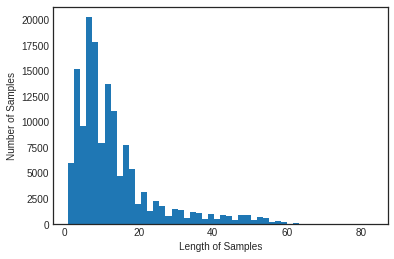

In [40]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [41]:
max_len = 60

In [42]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2224800   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,342,177
Trainable params: 2,342,177
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_train, y_train,
                    epochs=15, batch_size=60,
                    validation_split=0.2)

Epoch 1/15
1939/1939 [==============================] - 43s 19ms/step - loss: 0.3950 - acc: 0.8184 - val_loss: 0.3567 - val_acc: 0.8430
Epoch 2/15
1939/1939 [==============================] - 34s 17ms/step - loss: 0.3264 - acc: 0.8580 - val_loss: 0.3326 - val_acc: 0.8529
Epoch 3/15
1939/1939 [==============================] - 33s 17ms/step - loss: 0.2991 - acc: 0.8731 - val_loss: 0.3322 - val_acc: 0.8550
Epoch 4/15
1939/1939 [==============================] - 34s 18ms/step - loss: 0.2789 - acc: 0.8826 - val_loss: 0.3227 - val_acc: 0.8600
Epoch 5/15
1939/1939 [==============================] - 33s 17ms/step - loss: 0.2606 - acc: 0.8929 - val_loss: 0.3273 - val_acc: 0.8593
Epoch 6/15
1939/1939 [==============================] - 33s 17ms/step - loss: 0.2450 - acc: 0.9008 - val_loss: 0.3300 - val_acc: 0.8593
Epoch 7/15
1939/1939 [==============================] - 32s 17ms/step - loss: 0.2290 - acc: 0.9081 - val_loss: 0.3344 - val_acc: 0.8546
Epoch 8/15
1939/1939 [==========================

In [46]:
model.evaluate(X_test, y_test)

4544/4544 [==============================] - 31s 7ms/step - loss: 0.1703 - acc: 0.9413


[0.17028774321079254, 0.9412970542907715]

#### 시각화

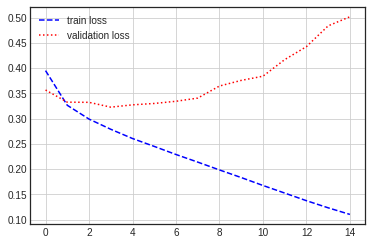

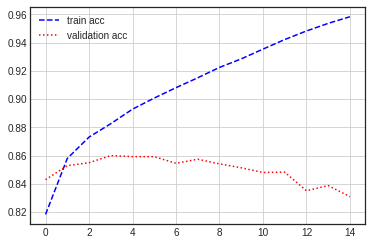

In [47]:
hist_dict = history.history

loss= hist_dict['loss']
val_loss= hist_dict['val_loss']
acc= hist_dict['acc']
val_acc= hist_dict['val_acc']

plt.plot(loss, 'b--', label='train loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='train acc')
plt.plot(val_acc, 'r:', label='validation acc')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [54]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  new_sequence = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequence, maxlen=max_len)
  score = float(model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [55]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')

정말 재미있고 흥미진진 했어요. -> 긍정(94.53%)
어떻게 이렇게 지루하고 재미없죠? -> 부정(99.93%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

In [58]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename='shopping.txt')

('shopping.txt', <http.client.HTTPMessage at 0x7fadf58c0090>)

In [61]:
total_data = pd.read_table('shopping.txt', names=['ratings','reviews'])
print(len(total_data))

total_data[:10]

200000


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [63]:
total_data['label'] = np.select([total_data.ratings>3], [1], default=0)
total_data[:10]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,0
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,0
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~,0
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...,0


In [66]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [67]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

199908


#### 훈련 데이터와 테스트 데이터 분리

In [70]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=111)
print(len(train_data))
print(len(test_data))

149931
49977


#### 레이블의 분포 확인

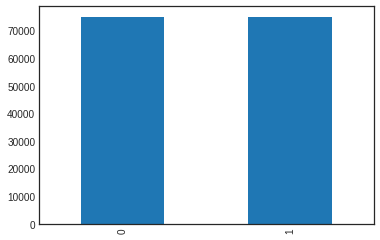

In [72]:
train_data['label'].value_counts().plot(kind='bar')

In [73]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74974
1,1,74957


#### 데이터 정제

In [74]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

149931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [75]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)

test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))

49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [76]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
mecab = Mecab()

train_data['reviews'] = train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] = train_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

In [79]:
test_data['reviews'] = test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] = test_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149931,)
(149931,)
(49977,)
(49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [83]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [84]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt/words_cnt)*100))
print('희긔 단어 등장 빈도 비율: {}'.format((rare_freq/words_freq)*100))

전체 단어 수: 51281
빈도가 2 이하인 희귀 단어 수 : 33298
희귀 단어 비율: 64.93243111483785
희긔 단어 등장 빈도 비율: 1.4020577944348425


In [86]:
vocab_size = words_cnt - rare_cnt +2
print(vocab_size)

17985


In [87]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [88]:
print(X_train[:2])

[[5461, 9, 7, 25, 286, 26, 1436, 124], [100, 123, 284, 109, 10, 18, 40, 28, 27, 6, 626, 278, 224, 558, 1550, 76, 3193, 1607, 387, 2, 225, 289, 25, 586, 24, 779, 9, 1217, 95, 51, 162, 157, 5950, 1601, 109, 10, 552, 63, 5, 73, 5212, 6, 114]]


In [89]:
print(X_test[:2])

[[21, 83, 6, 58, 359, 89, 37, 35, 4200, 262, 6], [1085, 2537, 3055, 728, 739, 17, 117, 66, 31, 63, 99]]


#### 패딩

In [90]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:',sum(map(len, X_train))/len(X_train))

리뷰 최대 길이: 86
리뷰 평균 길이: 18.488484702963362


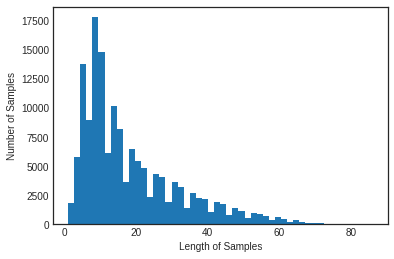

In [91]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [92]:
max_len = 60

In [93]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

In [94]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [95]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [98]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [99]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - 42s 20ms/step - loss: 0.2817 - acc: 0.8915 - val_loss: 0.2471 - val_acc: 0.9084

Epoch 00001: val_acc improved from -inf to 0.90836, saving model to best_model.h5
Epoch 2/15
2000/2000 [==============================] - 38s 19ms/step - loss: 0.2201 - acc: 0.9179 - val_loss: 0.2305 - val_acc: 0.9142

Epoch 00002: val_acc improved from 0.90836 to 0.91420, saving model to best_model.h5
Epoch 3/15
2000/2000 [==============================] - 39s 20ms/step - loss: 0.2031 - acc: 0.9256 - val_loss: 0.2219 - val_acc: 0.9180

Epoch 00003: val_acc improved from 0.91420 to 0.91796, saving model to best_model.h5
Epoch 4/15
2000/2000 [==============================] - 38s 19ms/step - loss: 0.1920 - acc: 0.9302 - val_loss: 0.2261 - val_acc: 0.9181

Epoch 00004: val_acc improved from 0.91796 to 0.91813, saving model to best_model.h5
Epoch 5/15
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1828 - acc: 0.9338 - val_loss: 0.21

In [102]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

1562/1562 [==============================] - 11s 7ms/step - loss: 0.2298 - acc: 0.9155


[0.2297951579093933, 0.9154811501502991]

In [100]:
model.evaluate(X_test, y_test)

1562/1562 [==============================] - 11s 7ms/step - loss: 0.2574 - acc: 0.9049


[0.25738638639450073, 0.9049362540245056]

#### 시각화

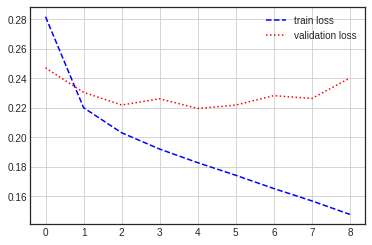

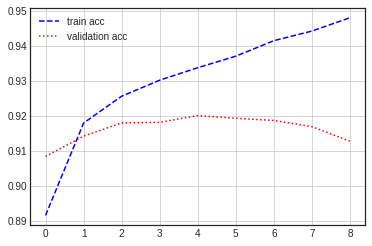

In [101]:
hist_dict = history.history

loss= hist_dict['loss']
val_loss= hist_dict['val_loss']
acc= hist_dict['acc']
val_acc= hist_dict['val_acc']

plt.plot(loss, 'b--', label='train loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='train acc')
plt.plot(val_acc, 'r:', label='validation acc')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [103]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  new_sequence = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequence, maxlen=max_len)
  score = float(loaded_model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [104]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은거 인정 ! 추가 구매 의향 있습니다!')

처음 써봤는데 대박 좋아요. -> 긍정(97.24%)
원래 배송이 이렇게 늦나요? -> 부정(98.43%)
좋은거 인정 ! 추가 구매 의향 있습니다! -> 긍정(95.35%)
